# Deteccion de objetos con Tensorflow Hub

In [6]:
! sudo pip install tensorflow==2.7.0
! pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 22 kB/s 
     |████████████████████████████████| 1.3 MB 30.4 MB/s 
     |████████████████████████████████| 463 kB 73.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220

In [ ]:
! pip install tensorflow_hub

## 1. Object Detection API

In [2]:
! git clone --depth 1 https://github.com/tensorflow/models 

Cloning into 'models'...
remote: Enumerating objects: 3422, done.
remote: Counting objects: 100% (3422/3422), done.
remote: Compressing objects: 100% (2853/2853), done.
remote: Total 3422 (delta 894), reused 1415 (delta 512), pack-reused 0
Receiving objects: 100% (3422/3422), 35.13 MiB | 29.58 MiB/s, done.
Resolving deltas: 100% (894/894), done.


In [1]:
%cd models/research

/content/models/research


In [4]:
! protoc object_detection/protos/*.proto --python_out=.

In [5]:
! cp object_detection/packages/tf2/setup.py .

In [2]:
! python -m pip install -q .

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.9 MB 38.2 MB/s 
     |████████████████████████████████| 352 kB 54.9 MB/s 
     |████████████████████████████████| 2.1 MB 48.2 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 67 kB 4.1 MB/s 
     |████████████████████████████████| 4.6 MB 63.0 MB/s 
     |████████████████████████████████| 237 kB 79.9 MB/s 
     |████████████████████████████████| 92 kB 8.3 MB/s 
     |████████████████████████████████| 99 kB 9.5 MB/s 
     |████████████████████████████████| 1.2 MB 50.8 MB/s 
     |███████████████████████

## 2. Tensorflow Hub

In [5]:
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [21]:
from object_detection.utils import visualization_utils as viz
from object_detection.utils.label_map_util import create_category_index_from_labelmap

In [40]:
model_path = 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1'
model = hub.load(model_path)

In [22]:
label_path = '/content/models/research/object_detection/data/mscoco_label_map.pbtxt'
cat_idx = create_category_index_from_labelmap(label_path)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
def predict_img(model, path):
  img = Image.open(path)
  width, height = img.size
  img = np.array(img)
  img = np.reshape(img,(1,height, width, -1))
  results = model(img)

  results = {k:v.numpy() for k, v in results.items()}

  boxes = results['detection_boxes'][0]
  classes = results['detection_classes'][0].astype('int')
  scores = results['detection_scores'][0]
  
  img2 = img.copy()
  viz.visualize_boxes_and_labels_on_image_array(
      img2[0],
      boxes,
      classes,
      scores,
      cat_idx,
      max_boxes_to_draw=15,
      min_score_thresh=0.5,
      use_normalized_coordinates=True
  )
  plt.figure(figsize=(12,12))
  plt.imshow(img2[0])
  plt.show()

Prueba del modelo

In [12]:
img_path = '/content/models/research/object_detection/test_images/image1.jpg'

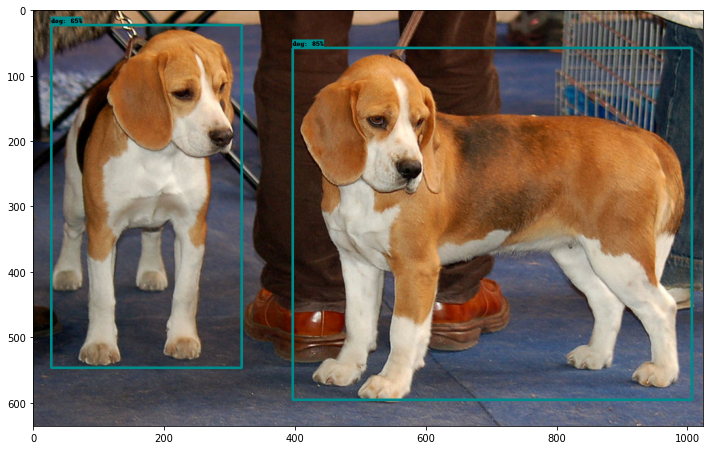

In [42]:
predict_img(model, img_path)

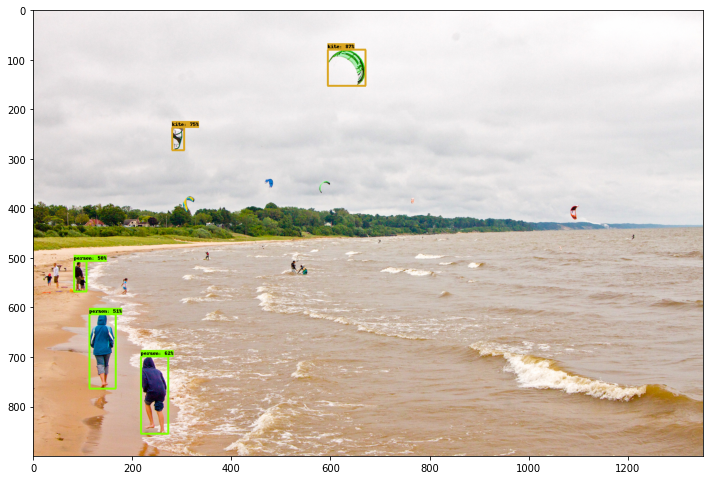

In [43]:
img_path = '/content/models/research/object_detection/test_images/image2.jpg'
predict_img(model, img_path)

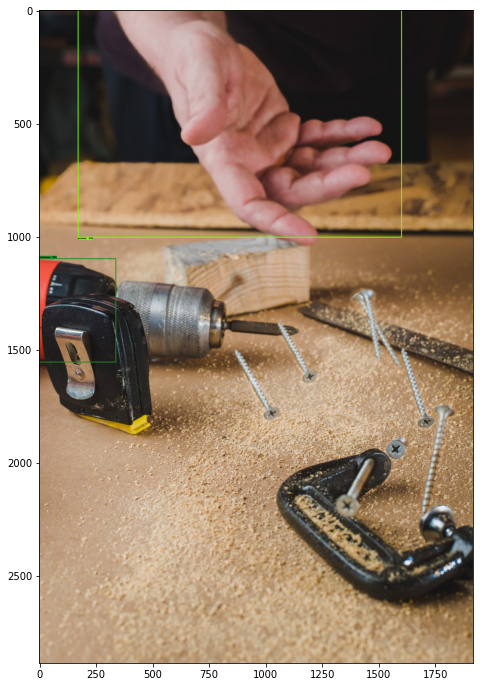

In [44]:
img_path = '/content/models/research/object_detection/test_images/image3.jpg'
predict_img(model, img_path)